# 05衡量回归算法的标准

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [2]:
boston=datasets.load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x=boston.data[:,5] #只是用房间数量这个特征

In [6]:
x.shape

(506,)

In [7]:
y=boston.target

In [8]:
y.shape

(506,)

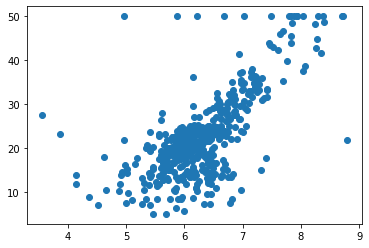

In [9]:
plt.scatter(x,y)
plt.show()

In [10]:
np.max(y)

50.0

In [11]:
x=x[y<50.0]
y=y[y<50.0]

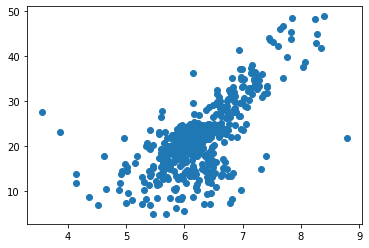

In [12]:
plt.scatter(x,y)
plt.show()

### 使用简单线性回归法

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=666)

In [20]:
x_train.shape

(367,)

In [21]:
x_test.shape

(123,)

In [22]:
from SimpleLinearRegression import SimpleLinearRegression

In [23]:
reg=SimpleLinearRegression()

In [25]:
reg.fit(x_train,y_train)

SimpleLinearRegression()

In [26]:
reg.a_

7.833972917686114

In [27]:
reg.b_

-27.252755266879902

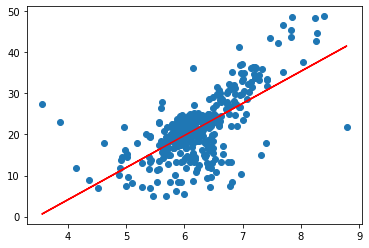

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color="r")
plt.show()

In [30]:
y_predict=reg.predict(x_test)

### MSE

In [31]:
mse_test=np.sum((y_predict-y_test)**2)/len(y_test)

In [32]:
mse_test

28.215949368640796

### RMSE

In [33]:
from math import sqrt

In [34]:
rmse_test =sqrt(mse_test)
rmse_test

5.311868726600912

### MAE

In [35]:
mae_test=np.sum(np.absolute(y_predict-y_test))/len(y_test)
mae_test

3.9489046062737843

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
mean_squared_error(y_test,y_predict)

28.215949368640796

In [38]:
mean_absolute_error(y_test,y_predict)

3.9489046062737843